### Imports

In [1]:
# External modules
import numpy as np
import tensortools as tt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Internal modules
from logger import logger
from constants import *
from utils import *
from fileops import load_conditioned_dataset

### Load data

In [2]:
fpath = '/Users/tlemaire/Documents/data/usnm/conditioned/alpha0.7_qadaptive_wq10.0s/suite2p_fs_3.56_reg_tif_tau_1.25/kd_G0.5_V0.05_npad10/linreg_nointercept/submap_0<-1_9->10every100/main/line3/20191112_mouse12_region1.h5'
logger.info(f'loading data from {os.path.basename(fpath)}...')
xtimeseries, popagg_timeseries, output_info_table, ROI_masks = load_conditioned_dataset(fpath)

 2023/10/20 18:49:19: loading data from 20191112_mouse12_region1.h5...
 2023/10/20 18:49:19: loading experiment info table...
 2023/10/20 18:49:19: loading conditioned timeseries data...
 2023/10/20 18:49:20: loading conditioned population-average timeseries data...
 2023/10/20 18:49:20: loading ROI masks...
 2023/10/20 18:49:20: data successfully loaded


### Extract array from data 

In [41]:
arr = mux_series_to_array(xtimeseries[Label.ZSCORE])

### Fit CP tensor decomposition

In [6]:
# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(arr, ranks=range(1, 9), replicates=4)

Fitting rank-1 models:   0%|          | 0/4 [00:00<?, ?it/s]/opt/anaconda3/envs/usnm2p/lib/python3.8/site-packages/tensortools/optimize/ncp_hals.py:185: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  Cp = factors[:, idx] @ grams[idx][:, p]
/opt/anaconda3/envs/usnm2p/lib/python3.8/site-packages/numba/core/typing/npydecl.py:965: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
                                                                    

Rank-1 models:  min obj, 0.95;  max obj, 0.95;  time to fit, 1.6s


Rank-2 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 7.0s


Rank-3 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 11.3s


Rank-4 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 7.0s


Rank-5 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 8.3s


Rank-6 models:  min obj, 0.91;  max obj, 0.92;  time to fit, 9.0s


Rank-7 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 13.7s


Rank-8 models:  min obj, 0.90;  max obj, 0.91;  time to fit, 11.4s


### Plot model ensemble convergence

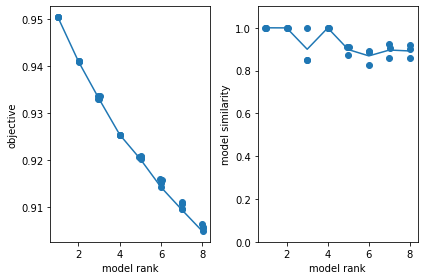

In [8]:
fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()

### Plot model factors

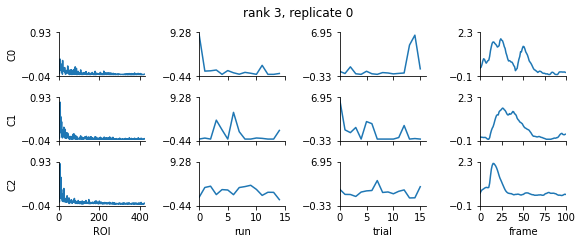

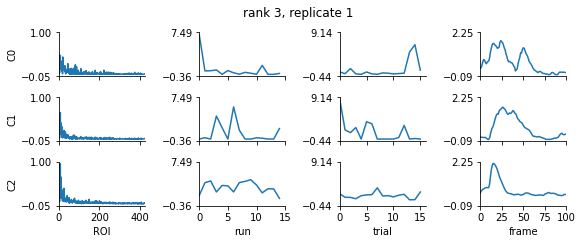

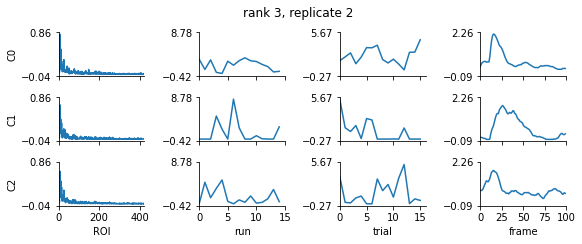

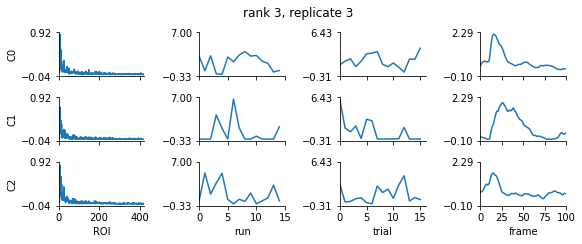

In [40]:
# Plot the low-d factors for an example model
ncomponents = 3  # number of components to plot
factors_list = ensemble.factors(ncomponents)
for ireplicate, factors in enumerate(factors_list):
    fig, *_ = tt.plot_factors(factors)
    fig.suptitle(f'rank {ncomponents}, replicate {ireplicate}', y=1.05)
    axes = np.array(fig.axes).reshape((ncomponents, -1))
    for i, ax in enumerate(axes[:, 0]):
        ax.set_ylabel(f'C{i}')
    for ax, lbl in zip(axes[-1, :], xtimeseries.index.names):
        ax.set_xlabel(lbl)